<a href="https://colab.research.google.com/github/AlexKostjuk/Dz_13/blob/master/dz_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Імпорт бібліотек
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import kagglehub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist



In [ ]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Створення моделі (без Dropout)
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,), kernel_initializer='he_normal'),
    # layers.BatchNormalization(),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    # layers.BatchNormalization(),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    # layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Тренування моделі
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8789 - loss: 0.4024 - val_accuracy: 0.9619 - val_loss: 0.1192
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9728 - loss: 0.0863 - val_accuracy: 0.9769 - val_loss: 0.0751
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0526 - val_accuracy: 0.9775 - val_loss: 0.0746
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9894 - loss: 0.0327 - val_accuracy: 0.9785 - val_loss: 0.0731
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9915 - loss: 0.0268 - val_accuracy: 0.9779 - val_loss: 0.0832
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9792 - val_loss: 0.0770
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9939 - loss: 0.0181 - val_accuracy: 0.9802 - val_loss: 0.0742
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.

In [ ]:

# Візуалізація результатів
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

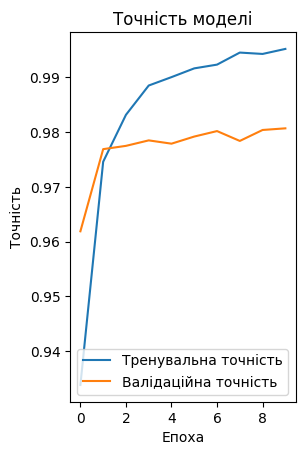

In [ ]:
# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

In [ ]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


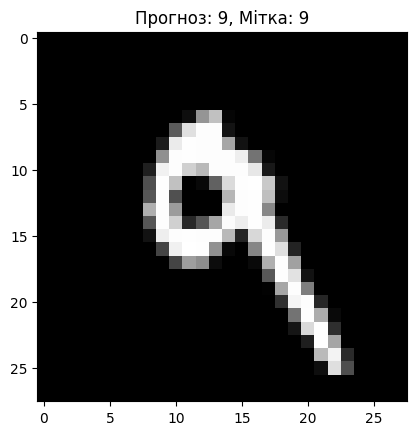

In [ ]:
# Візуалізація тестового зображення
plt.figure()
plt.imshow(x_test[7].reshape(28, 28), cmap='gray')
plt.title(f'Прогноз: {np.argmax(predictions[7])}, Мітка: {np.argmax(y_test[7])}')
plt.show()

In [ ]:
model = models.load_model('/content/drive/MyDrive/mnist-model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Перегляд структури моделі
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 692,684 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
model = Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
x_train = x_train/ 255.0
y_train = y_train/255.0

In [ ]:
histori= model.evaluate(x_train, y_train, epochs=3, batch_size=64)


ValueError: Arguments not recognized: {'epochs': 3}